# Projections comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
plt.style.use("ggplot")

import sys
import os
module_path = os.path.abspath(os.path.join('../scripts'))
sys.path.append(module_path)
from projections import *



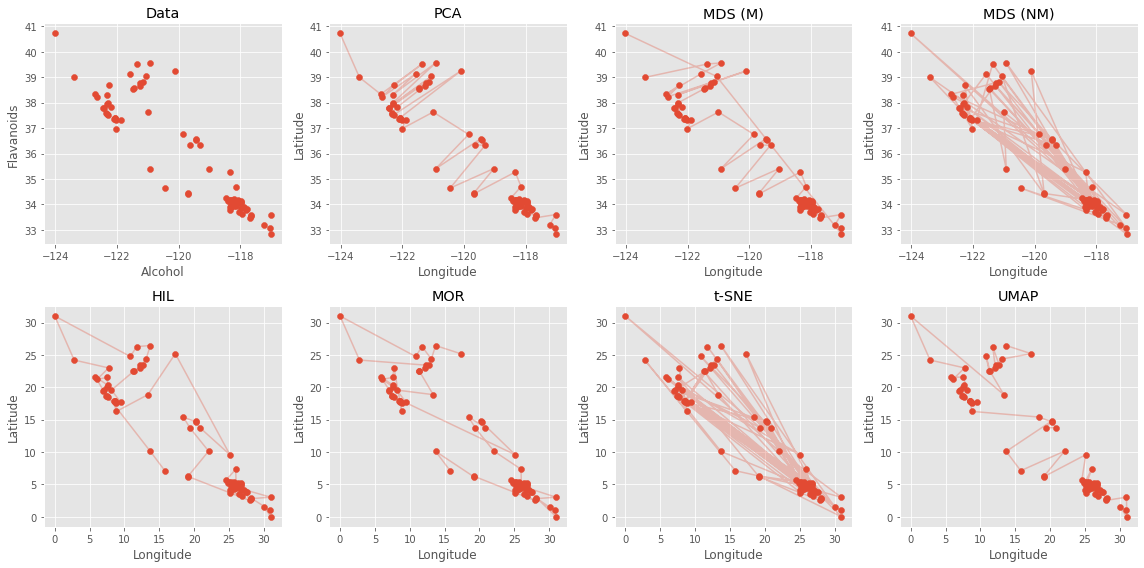

In [2]:
np.random.seed(12345)
data = fetch_california_housing(return_X_y=True, as_frame=True)[0][["Longitude", "Latitude"]].values
data = data[np.random.randint(0, data.shape[0], size = 80), :]
projections_methods = ['pca', 'mds_metric', 'mds_non_metric', 'hilbert', 'morton', 'tsne', 'umap']

fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (16, 8))
ax = ax.flatten()


projections_labels = {"pca": "PCA", "mds_metric": "MDS (M)", "mds_non_metric": "MDS (NM)",
                     "hilbert" : "HIL", "morton": "MOR", "tsne": "t-SNE", "umap": "UMAP"}

k = 0
ax[k].scatter(data[:, 0], data[:, 1])
ax[k].set_xlabel("Alcohol")
ax[k].set_ylabel("Flavanoids")
ax[k].set_title("Data")

k += 1
for projection in projections_methods:
    proj = np.array(projection_selector(data, projection, order = False))
    data_ordered = data[proj.argsort(axis = 0), :].reshape(-1, 2)
    ax[k].plot(data_ordered[:, 0], data_ordered[:, 1], alpha = 0.3)
    ax[k].scatter(data[:, 0], data[:, 1])
    ax[k].set_xlabel("Longitude")
    ax[k].set_ylabel("Latitude")
    ax[k].set_title(projections_labels[projection])
    k +=1
    
plt.tight_layout()
plt.savefig("figs/projection-example.pdf")
plt.show()